In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.ensemble import RandomForestClassifier


     |████████████████████████████████| 11.8 MB 1.9 MB/s eta 0:00:01
no display found. Using non-interactive Agg backend


In [25]:
df = pd.read_csv('train.csv')

head = df.head()

summary = df.sum()

print(head)

print(summary)


   deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0     28647                    5.12                   41.11   
1     36175                   36.60                    5.16   
2     16107                    5.51                    5.04   
3     27362                    4.66                   39.85   
4     19463                    5.10                   43.24   

   avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                    6.56                   25.39            0.086667   
1                    6.23                    6.96            0.136667   
2                    4.52                    5.96           -0.460000   
3                   35.76                   40.69            0.076667   
4                    4.63                    5.26            0.040000   

   charging_rate_lag7  avg_time_discharging_lag1  avg_time_discharging_lag2  \
0           -0.006667                       4.37                      91.70   
1           -1.296667   

In [27]:
df_corr=df.corr()


df_corr


,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
deviceid,1.000000,0.004142,-0.001142,0.002691,0.003504,-0.004674,-0.001521,0.004854,-0.000761,0.002166,...,0.000777,0.009035,-0.002188,0.001162,-0.000333,0.000704,0.001197,0.000564,-0.002132,0.001033
avg_time_charging_lag1,0.004142,1.000000,0.001707,0.001525,-0.005240,0.011670,-0.003474,0.979988,0.001834,0.001580,...,-0.192962,-0.010313,-0.022071,-0.067691,-0.080069,0.241628,0.235666,-0.086113,-0.001742,0.238768
avg_time_charging_lag2,-0.001142,0.001707,1.000000,-0.010682,-0.000641,-0.000856,-0.000638,0.001050,0.980808,-0.009903,...,-0.193316,-0.006186,-0.007043,-0.074024,-0.088043,0.242112,0.236300,-0.090766,0.010125,0.239353
avg_time_charging_lag3,0.002691,0.001525,-0.010682,1.000000,-0.005379,-0.001756,-0.002851,0.001107,-0.012405,0.981309,...,-0.199595,-0.009667,-0.000146,-0.072953,-0.084776,0.242527,0.238656,-0.089027,0.011651,0.241052
avg_time_charging_lag7,0.003504,-0.005240,-0.000641,-0.005379,1.000000,-0.004053,-0.000357,-0.006494,0.001475,-0.004824,...,-0.189267,-0.010842,-0.016543,-0.070883,-0.082705,0.233331,0.229206,-0.089236,-0.001513,0.231647
charging_rate_lag3,-0.004674,0.011670,-0.000856,-0.001756,-0.004053,1.000000,0.005428,0.010883,-0.000590,-0.002937,...,0.000019,0.001547,-0.001121,0.006415,0.006845,0.009668,0.001095,0.002644,-0.000853,0.004052
charging_rate_lag7,-0.001521,-0.003474,-0.000638,-0.002851,-0.000357,0.005428,1.000000,-0.003747,-0.000784,-0.002533,...,-0.000433,-0.003858,0.009302,0.005693,0.005266,0.012703,0.003128,-0.000739,-0.005071,0.006438
avg_time_discharging_lag1,0.004854,0.979988,0.001050,0.001107,-0.006494,0.010883,-0.003747,1.000000,0.001424,0.001240,...,-0.191629,-0.009054,-0.018617,-0.064333,-0.077280,0.235632,0.239623,-0.084580,-0.002680,0.239316
avg_time_discharging_lag2,-0.000761,0.001834,0.980808,-0.012405,0.001475,-0.000590,-0.000784,0.001424,1.000000,-0.011497,...,-0.195250,-0.004895,-0.003594,-0.070928,-0.085794,0.238905,0.242819,-0.089744,0.010238,0.242553
avg_time_discharging_lag3,0.002166,0.001580,-0.009903,0.981309,-0.004824,-0.002937,-0.002533,0.001240,-0.011497,1.000000,...,-0.199403,-0.007473,0.002562,-0.070887,-0.083501,0.239485,0.244503,-0.089013,0.010613,0.243864


In [ ]:
rf_prediction_train = cc_rf.predict(train_X)
rf_prediction_valid = cc_rf.predict(valid_X)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(train_X, train_y)
gbm.predict(valid_X[:2])

NameError: name 'train_X' is not defined

In [37]:
importances = list(zip(gbm.feature_importances_, df.columns))
pd.DataFrame(importances, index=[x for (_,x) in importances]).sort_values(by = 0, ascending = False).plot(kind = 'bar', color = 'r')

NameError: name 'gbm' is not defined

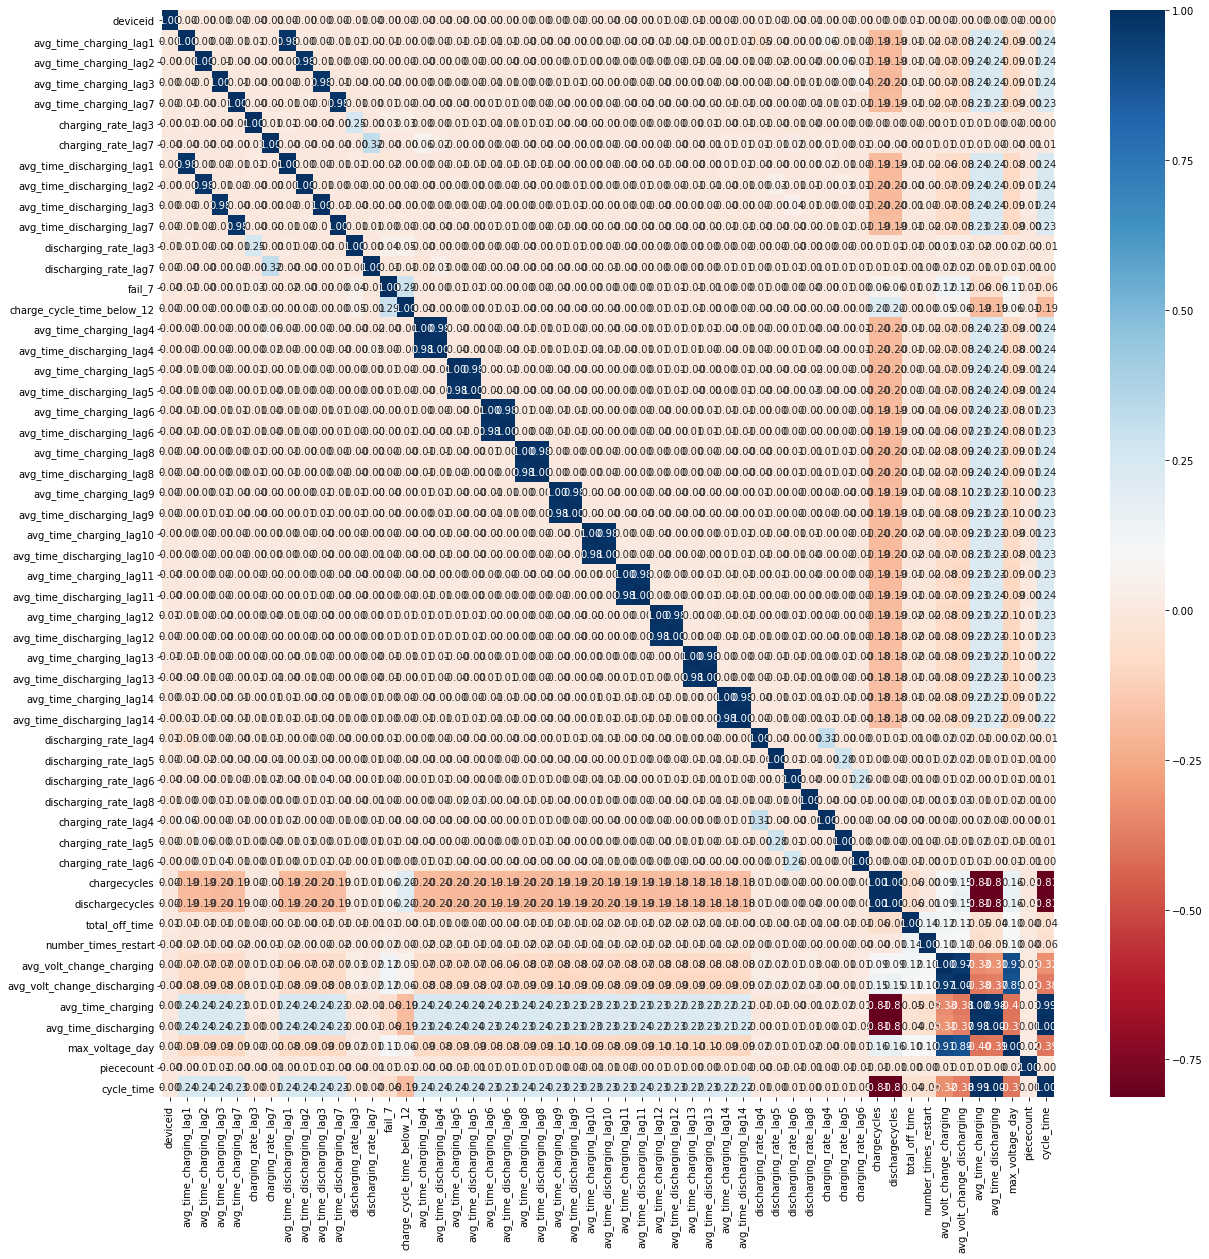

In [35]:
%matplotlib inline
# correlation between the variables
correlation = df.corr()
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="RdBu", ax=ax)
plt.show()